In [1]:
import netCDF4 as nc 

import numpy as np
import pandas as pd
import os, sys
import time
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (12,7)

from glob import glob

# jupyter用
from IPython.display import clear_output

In [28]:
import matplotlib.patches as mpatches

In [14]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
sys.path.append('../')

In [4]:
from dep.mask import (binary_padding, 
                      binary_interpret,
                     bitmask_unpack, 
                     qa_dict)

# version5 fire detection

In [5]:
fpath = 'D:/download/AVHRR-Land_19850104.nc'
with nc.Dataset(fpath, 'r') as ds:
    qa = ds.variables['QA'][0,:,:]
    b1 = ds.variables['SREFL_CH1'][0,:,:]  #650nm
    b2 = ds.variables['SREFL_CH2'][0,:,:]  #860nm
    b3 = ds.variables['BT_CH3'][0,:,:]     # 3750nm
    b4 = ds.variables['BT_CH4'][0,:,:]     # 11000nm
    b5 = ds.variables['BT_CH5'][0,:,:]     # 12000nm

In [6]:
qa_masks = bitmask_unpack(qa, width=16)

In [7]:
mask1 = np.sum(qa_masks[1:7,:,:], axis = 0)
mask1r = np.where(mask1>0 , 0, 1)

In [8]:
# day pixels
cond1 = b3 > 310
cond2 = ((b3 - b4) > 10)
cond3 = b2 < 0.35

In [9]:
conds = cond1 + cond2 + cond3
conds = np.where(conds > 0, 0, 1)

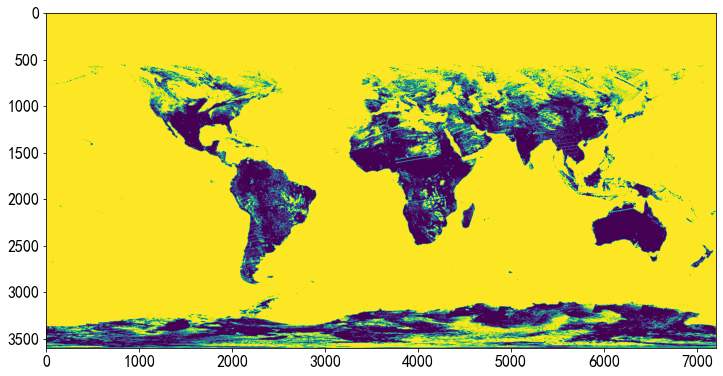

In [16]:
plt.imshow(conds)

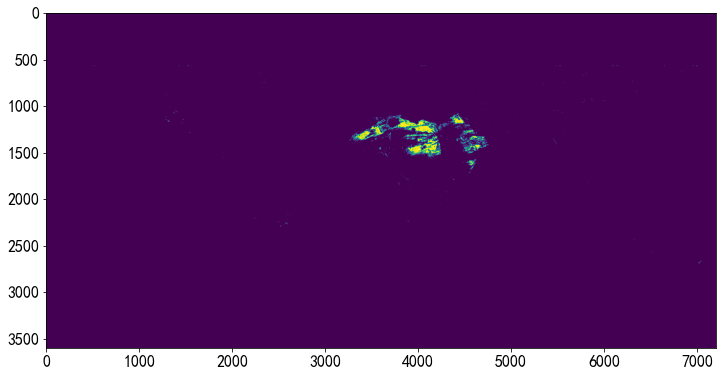

In [24]:
# strong surface reflection from deserts
plt.imshow(mask1r * conds)

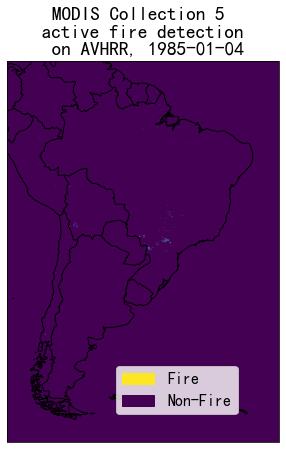

In [31]:
firev5 = mask1r * conds

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
p1 = ax.imshow(firev5[1600:3000,2000:3000], extent = [-80,-30, -60, 10]) # Amazon region
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

# colormap used by imshow
colors = [ p1.cmap(p1.norm(value)) for value in [1,0]]
# create a patch (proxy artist) for every color 
tp = ['Fire','Non-Fire']
patches = [ mpatches.Patch(color=colors[i], label=f"{tp[i]}") for i in range(len(tp)) ]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(0.4, 0.2), loc=2, borderaxespad=0. )

ax.set_title('MODIS Collection 5 \n active fire detection \n on AVHRR, 1985-01-04')
fig.savefig('../note/0104_activefire.png', bbox_inches='tight')

In [19]:
print(-180 + 2000 * 0.05)
print(-180 + 3000 * 0.05)
print(90 - 1600 * 0.05)
print(90 - 3000 * 0.05)

-80.0
-30.0
10.0
-60.0
